In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset='/content/drive/MyDrive/ML/SUV_Purchase.csv'
import pandas as pd
df=pd.read_csv(dataset)

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<function matplotlib.pyplot.show(close=None, block=None)>

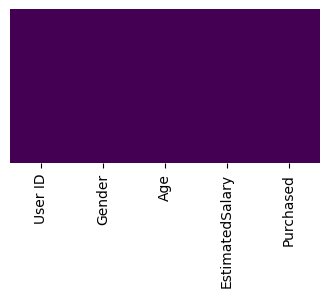

In [ ]:
#seaborn lib- heatmaps(To visualize the missing values)
import seaborn as sns
import  matplotlib.pyplot as plt
def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show
get_heatmap(df)

In [ ]:
df= df.dropna()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#Separating features and traget
X= df.drop(['User ID', 'Purchased'], axis=1)
Y = df['Purchased']

print(X)
print(Y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


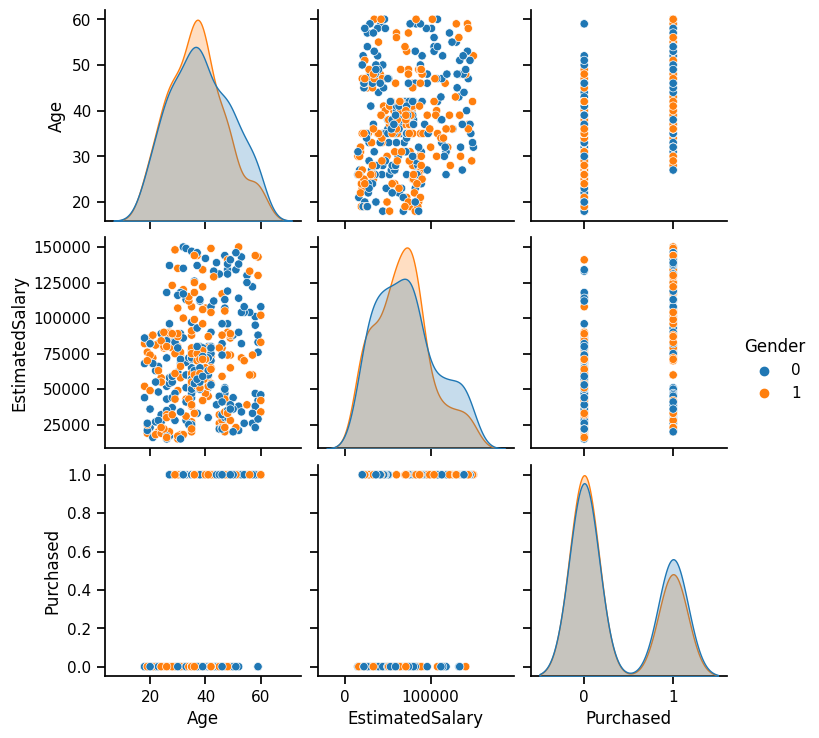

In [ ]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],hue='Gender')

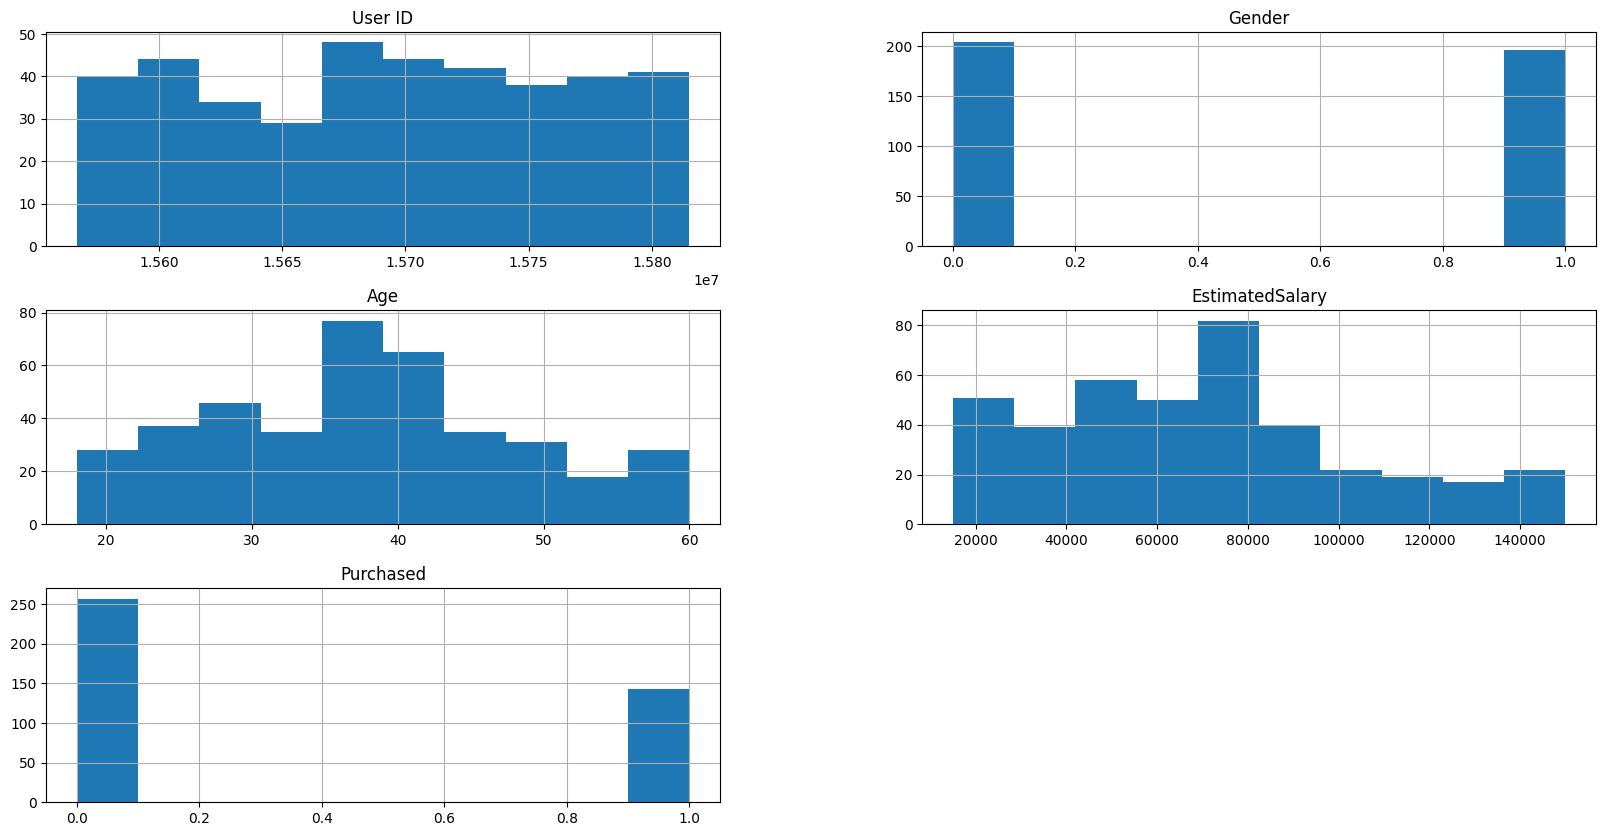

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=10,figsize=(20,10))
plt.show()

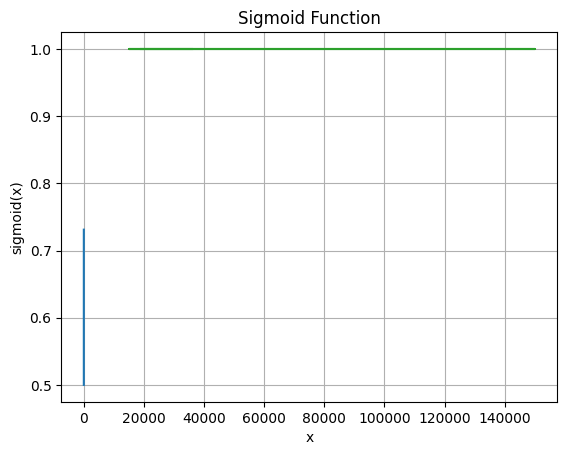

In [ ]:
import numpy as np

import matplotlib.pyplot as plt




def sigmoid(X):

    return 1 / (1 + np.exp(-X))




# Generate x values from -10 to 10

X




# Calculate corresponding y values using the sigmoid function

y = sigmoid(X)




# Plot the sigmoid function

plt.plot(X, y)

plt.xlabel('x')

plt.ylabel('sigmoid(x)')

plt.title('Sigmoid Function')

plt.grid(True)

plt.show()

<Axes: >

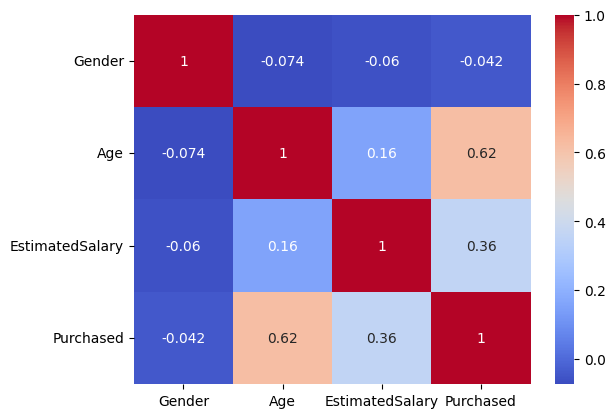

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['Gender','Age','EstimatedSalary','Purchased']
data=df[columns]
corelation_matrix= data.corr()

sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm')

In [ ]:
Purchased_corelations = corelation_matrix["Purchased"]

In [ ]:
purchased_corelations_sorted = Purchased_corelations.sort_values(ascending=False)

In [ ]:
print(purchased_corelations_sorted)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64


In [ ]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train =sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [ ]:
X_train

array([[-0.97530483,  1.28071341,  1.96839181],
       [-0.97530483,  0.26399911, -0.55637336],
       [ 1.02532046, -0.19814375,  1.59112805],
       [ 1.02532046,  0.35642768,  0.28521503],
       [ 1.02532046, -0.75271519,  0.54639763],
       [ 1.02532046,  0.17157054,  0.22717445],
       [-0.97530483,  1.09585627, -0.75951538],
       [ 1.02532046, -1.67700092,  0.11109329],
       [ 1.02532046, -0.29057233,  0.08207301],
       [ 1.02532046,  0.81857055, -1.36894146],
       [ 1.02532046, -0.10571518,  2.14251354],
       [-0.97530483, -0.93757234, -0.96265741],
       [ 1.02532046,  0.35642768,  0.98170197],
       [-0.97530483, -1.76942949, -1.28188059],
       [-0.97530483,  1.28071341,  1.27190486],
       [ 1.02532046, -0.29057233, -1.2528603 ],
       [ 1.02532046, -1.76942949,  0.16913387],
       [-0.97530483,  0.26399911,  0.02403243],
       [ 1.02532046,  1.00342769,  0.51737734],
       [-0.97530483, -0.01328661, -0.58539365],
       [-0.97530483, -0.66028662,  0.024

In [ ]:
Y_train

320    1
124    0
308    1
114    0
143    0
      ..
23     1
368    0
48     1
27     1
314    0
Name: Purchased, Length: 320, dtype: int64

In [ ]:
X_test

array([[ 1.02532046, -0.19814375, -0.52735307],
       [-0.97530483, -0.19814375,  0.14011358],
       [-0.97530483,  0.26399911, -1.16579943],
       [-0.97530483, -0.29057233,  0.19815416],
       [ 1.02532046, -0.10571518,  0.25619474],
       [ 1.02532046, -0.29057233,  1.09778313],
       [-0.97530483,  0.81857055, -0.61441394],
       [ 1.02532046, -0.75271519,  1.06876284],
       [-0.97530483,  0.35642768,  0.25619474],
       [-0.97530483, -0.29057233, -0.38225162],
       [ 1.02532046, -0.66028662, -0.35323133],
       [-0.97530483, -0.84514376,  0.3722759 ],
       [-0.97530483, -1.12242948,  0.28521503],
       [-0.97530483,  0.81857055, -0.55637336],
       [-0.97530483, -0.10571518, -1.07873856],
       [ 1.02532046,  0.07914197,  1.50406718],
       [ 1.02532046, -1.03000091, -0.35323133],
       [-0.97530483, -0.19814375, -0.58539365],
       [-0.97530483,  1.83528485,  0.8946411 ],
       [-0.97530483,  0.91099912, -1.19481972],
       [ 1.02532046, -1.12242948, -1.572

In [ ]:
Y_test

117    0
120    0
147    0
260    0
303    1
      ..
304    0
225    0
317    0
214    0
236    0
Name: Purchased, Length: 80, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
coefficients=model.coef_
print(coefficients)

[[0.13235262 2.36624269 1.22399604]]


In [ ]:
type(coefficients)

numpy.ndarray

In [ ]:
intercept=model.intercept_
print(intercept)

[-0.86793986]


In [ ]:
model.score(X_train,Y_train)

0.85

In [ ]:
model.score(X_test,Y_test)

0.8625

In [ ]:
X=sst.transform(X)

In [ ]:
model.score(X,Y)

0.8525

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
acc=accuracy_score(Y_test,Y_pred)
print(acc)

0.8625


In [ ]:
Gender=int(input("Enter the number for gender (male:1,femmale:0) "))
Age=int(input("enter the age"))
EstimatedSalary=int(input("enter the estimated salary"))
coefficients=model.coef_[0]
intercept=model.intercept_[0]
Prediction=intercept+(coefficients[0]*Gender)+(coefficients[1]*Age)+(coefficients[2]*EstimatedSalary)
Prediction

Enter the number for gender (male:1,femmale:0) 0
enter the age32
enter the estimated salary150000


183674.25739100517

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))




# Convert negative values to probabilities using sigmoid function
probabilities = sigmoid(Prediction)

print(probabilities)


1.0


In [ ]:
Pred=intercept+( 0.14678583*Gender)+(2.2009634*Age)+(1.01627378*EstimatedSalary)
Pred

152510.62988893557

In [ ]:
import pandas as pd
new_data = pd.DataFrame({
    'Gender': [0],
    'Age': [32],
    'EstimatedSalary': [1500000]
})


In [ ]:
new_data

,Gender,Age,EstimatedSalary
0,0,32,1500000


In [ ]:
prediction = model.predict(new_data[['Gender', 'Age', 'EstimatedSalary']])
print(prediction[0])
print(f"Prediction: {'Will Purchase' if prediction[0] == 1 else 'Will Not Purchase'}")

1
Prediction: Purchased


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


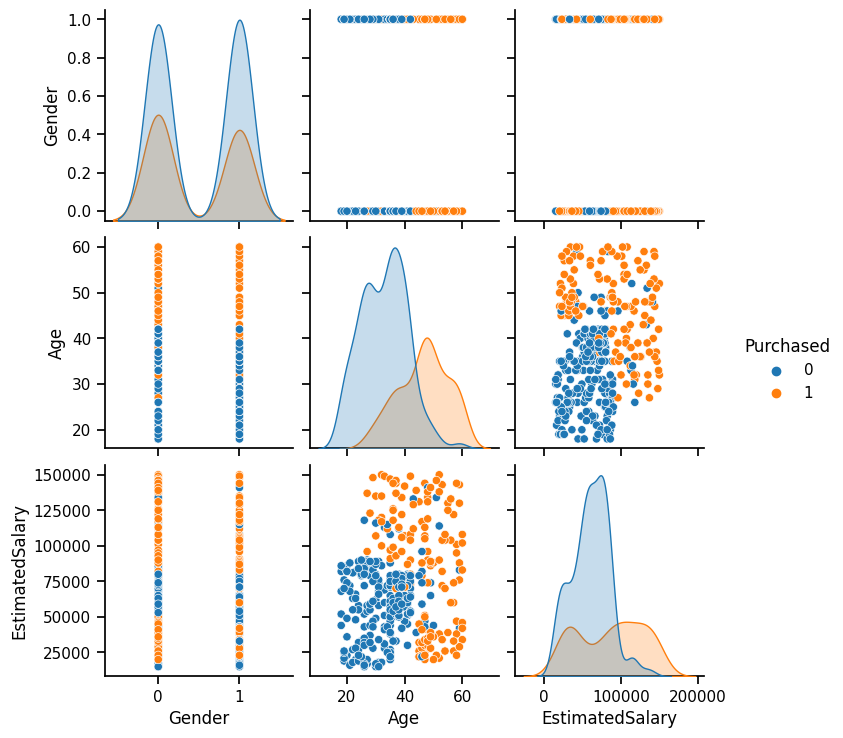

In [ ]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],hue='Purchased')